# Math 189 - CS Major Enrollement at UC Campuses

# Research Question

How do gender enrollment and graduation trends in Computer Science programs at UC schools near major tech hubs (UCB, UCLA, UCSD, UCD, UCSC) compare to those at UCs located farther from these hubs (UCSB, UCR, UCM, UCI) from 2017 to 2022?

## Background and Prior Work

# Hypothesis


# Data

## Data overview

- Dataset #1
  - Dataset Name: DataUSA Datasets on Graduates’ Majors
  - Link to the dataset: https://datausa.io/search/?dimension=University (General Source)
    - We have 18 sub-datasets in total
      - UC Berkeley: https://docs.google.com/spreadsheets/d/1mWQo9-sF1Gv0EzZAiJNDFJ1GXFRtW2ExmL3Xh5oqC94/edit?gid=0#gid=0
      - UC Davis: https://docs.google.com/spreadsheets/d/1mWLnTyUHzo9cedWqUYC-CKvT8ctdReJVNEy-4YPvMpM/edit?gid=0#gid=0
      - UCLA: https://docs.google.com/spreadsheets/d/1TEjgqAb6DKOZlwCFm1TxNvTi7C2lo-02YMeDB7PXUJE/edit?gid=0#gid=0
      - UC Irvine: https://docs.google.com/spreadsheets/d/1n3frMOAKWhKPswrZlVjLlHyVkGpGPJlHz-_TmfU5dH8/edit?usp=sharing 
      - UC San Diego: https://docs.google.com/spreadsheets/d/14HsxrRD9Srs2cLC_pV1BlsBPonxbwaEhcphnqL5D4WM/edit?gid=275689308#gid=275689308 
      - UC Santa Barbra: https://docs.google.com/spreadsheets/d/1AdzX2m0Xb5HcYrh3MVfqP0ruBG0DtGG3uZP1QqMXG_Y/edit?usp=sharing 
      - UC Riverside: https://docs.google.com/spreadsheets/d/1WNtmMvjnsUffPmcSkbZhrb8-l2b9qfI8seH94i2Vylk/edit?gid=604871786#gid=604871786 
      - UC Santa Cruz: https://docs.google.com/spreadsheets/d/11XbxM0u-ZahWgqercf9cQjkbeqzRiLlpCcMlRJgZMIQ/edit?gid=0#gid=0 
      - UC Merced: https://docs.google.com/spreadsheets/d/142Jrv9n4m89BffdyU_xgsMTKLMDTeJtW-OQdI0Vhb5M/edit?usp=sharing 
https://datausa.io/profile/university/university-of-california-merced#graduates  

  - Number of observations: 19460 (combined 9 schools and both genders)
  - Number of variables: 5 (Major, Year, University, Gender, Completions)

**Important Variables:**
- Year (int): The year of graduation, ranging from 2017 to 2022.
- CIP6 (string): The Classification of Instructional Programs (CIP) code that categorizes the major titles. This variable will be used to identify whether a major belongs to "STEM" or "Social Science" based on predefined keywords.
- Completion (int): The number of degrees completed in each major.
- University (string): The name of the university where the students graduated.
- Gender (string): Men and Women

**Concepts:**
- CIP6 codes serve as proxies for categorizing majors into "STEM" or "Social Science."
- Completion metrics reflect the number of graduates in each major.

**Data Integration:**

The datasets across the nine schools provide a detailed understanding of each graduating class from 2017 to 2022 by gender. Initially, these datasets contained variables such as the declared major name, number of completed students, university name, and gender. After cleaning, we focus on essential variables: ‘Year’ (int), ‘CIP6’ (string), ‘University’ (string), and ‘Completion’ (int) that are important to our research question. We concatenated the cleaned male and female datasets from all nine UC campuses into one large dataframe. This unified dataset will include all necessary variables for future analysis, enabling a comprehensive examination of gender differences in major choices across UC schools.

## DataUSA Datasets on Graduates’ Majors (separated by gender)

In [2]:
%pip install pandas
%pip install requests

import pandas as pd
import requests


[notice] A new release of pip is available: 24.1.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
%pip install seaborn
%pip install patsy
%pip install statsmodels

import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import numpy as np
import scipy.stats as stats



[notice] A new release of pip is available: 24.1.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.1.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
# read in female datasets from 9 campuses
response = requests.get('http://elpaso-app.datausa.io/api/data?University=110635&measures=Completions&drilldowns=CIP6&order=Completions&sort=desc&Gender=2')
data = response.json()
df_ucb_f = pd.json_normalize(data['data'])

response = requests.get('http://elpaso-app.datausa.io/api/data?University=110662&measures=Completions&drilldowns=CIP6&order=Completions&sort=desc&Gender=2')
data = response.json()
df_ucla_f = pd.json_normalize(data['data'])

response = requests.get('http://elpaso-app.datausa.io/api/data?University=110653&measures=Completions&drilldowns=CIP6&order=Completions&sort=desc&Gender=2')
data = response.json()
df_uci_f = pd.json_normalize(data['data'])

response = requests.get('http://elpaso-app.datausa.io/api/data?University=110705&measures=Completions&drilldowns=CIP6&order=Completions&sort=desc&Gender=2')
data = response.json()
df_ucsb_f = pd.json_normalize(data['data'])

response = requests.get('http://elpaso-app.datausa.io/api/data?University=110680&measures=Completions&drilldowns=CIP6&order=Completions&sort=desc&Gender=2')
data = response.json()
df_ucsd_f = pd.json_normalize(data['data'])

response = requests.get('http://elpaso-app.datausa.io/api/data?University=110714&measures=Completions&drilldowns=CIP6&order=Completions&sort=desc&Gender=2')
data = response.json()
df_ucsc_f = pd.json_normalize(data['data'])

response = requests.get('http://elpaso-app.datausa.io/api/data?University=110644&measures=Completions&drilldowns=CIP6&order=Completions&sort=desc&Gender=2')
data = response.json()
df_ucd_f = pd.json_normalize(data['data'])

response = requests.get('http://elpaso-app.datausa.io/api/data?University=445188&measures=Completions&drilldowns=CIP6&order=Completions&sort=desc&Gender=2')
data = response.json()
df_ucm_f = pd.json_normalize(data['data'])

response = requests.get('http://elpaso-app.datausa.io/api/data?University=110671&measures=Completions&drilldowns=CIP6&order=Completions&sort=desc&Gender=2')
data = response.json()
df_ucr_f = pd.json_normalize(data['data'])

frames = [df_ucb_f, df_ucla_f, df_uci_f, df_ucsb_f, df_ucsd_f, df_ucsc_f, df_ucd_f, df_ucm_f, df_ucr_f]
result_female = pd.concat(frames)
result_female

,ID CIP6,CIP6,ID Year,Year,ID University,University,ID Gender,Gender,Completions,Slug University,Slug CIP6
0,260406,Cellular & Molecular Biology,2021,2021,110635,University of California-Berkeley,2,Women,555,university-of-california-berkeley,cellular-molecular-biology
1,260406,Cellular & Molecular Biology,2022,2022,110635,University of California-Berkeley,2,Women,535,university-of-california-berkeley,cellular-molecular-biology
2,260406,Cellular & Molecular Biology,2020,2020,110635,University of California-Berkeley,2,Women,474,university-of-california-berkeley,cellular-molecular-biology
3,260406,Cellular & Molecular Biology,2019,2019,110635,University of California-Berkeley,2,Women,424,university-of-california-berkeley,cellular-molecular-biology
4,450603,Econometrics & Quantitative Economics,2021,2021,110635,University of California-Berkeley,2,Women,383,university-of-california-berkeley,econometrics-quantitative-economics
...,...,...,...,...,...,...,...,...,...,...,...
862,520301,Accounting,2021,2021,110671,University of California-Riverside,2,Women,0,university-of-california-riverside,accounting-520301
863,520301,Accounting,2022,2022,110671,University of California-Riverside,2,Women,0,university-of-california-riverside,accounting-520301
864,520601,Business & Managerial Economics,2021,2021,110671,University of California-Riverside,2,Women,0,university-of-california-riverside,business-managerial-economics
865,520601,Business & Managerial Economics,2022,2022,110671,University of California-Riverside,2,Women,0,university-of-california-riverside,business-managerial-economics


In [5]:
# read in male datasets for 9 campuses
response = requests.get('http://elpaso-app.datausa.io/api/data?University=110635&measures=Completions&drilldowns=CIP6&order=Completions&sort=desc&Gender=1')
data = response.json()
df_ucb_f = pd.json_normalize(data['data'])

response = requests.get('http://elpaso-app.datausa.io/api/data?University=110662&measures=Completions&drilldowns=CIP6&order=Completions&sort=desc&Gender=1')
data = response.json()
df_ucla_f = pd.json_normalize(data['data'])

response = requests.get('http://elpaso-app.datausa.io/api/data?University=110653&measures=Completions&drilldowns=CIP6&order=Completions&sort=desc&Gender=1')
data = response.json()
df_uci_f = pd.json_normalize(data['data'])

response = requests.get('http://elpaso-app.datausa.io/api/data?University=110705&measures=Completions&drilldowns=CIP6&order=Completions&sort=desc&Gender=1')
data = response.json()
df_ucsb_f = pd.json_normalize(data['data'])

response = requests.get('http://elpaso-app.datausa.io/api/data?University=110680&measures=Completions&drilldowns=CIP6&order=Completions&sort=desc&Gender=1')
data = response.json()
df_ucsd_f = pd.json_normalize(data['data'])

response = requests.get('http://elpaso-app.datausa.io/api/data?University=110714&measures=Completions&drilldowns=CIP6&order=Completions&sort=desc&Gender=1')
data = response.json()
df_ucsc_f = pd.json_normalize(data['data'])

response = requests.get('http://elpaso-app.datausa.io/api/data?University=110644&measures=Completions&drilldowns=CIP6&order=Completions&sort=desc&Gender=1')
data = response.json()
df_ucd_f = pd.json_normalize(data['data'])

response = requests.get('http://elpaso-app.datausa.io/api/data?University=445188&measures=Completions&drilldowns=CIP6&order=Completions&sort=desc&Gender=1')
data = response.json()
df_ucm_f = pd.json_normalize(data['data'])

response = requests.get('http://elpaso-app.datausa.io/api/data?University=110671&measures=Completions&drilldowns=CIP6&order=Completions&sort=desc&Gender=1')
data = response.json()
df_ucr_f = pd.json_normalize(data['data'])

frames = [df_ucb_f, df_ucla_f, df_uci_f, df_ucsb_f, df_ucsd_f, df_ucsc_f, df_ucd_f, df_ucm_f, df_ucr_f]
result_male = pd.concat(frames)
result_male


,ID CIP6,CIP6,ID Year,Year,ID University,University,ID Gender,Gender,Completions,Slug University,Slug CIP6
0,110701,Computer Science,2020,2020,110635,University of California-Berkeley,1,Men,658,university-of-california-berkeley,computer-science-110701
1,141001,Electrical & Electronics Engineering,2022,2022,110635,University of California-Berkeley,1,Men,646,university-of-california-berkeley,electrical-electronics-engineering
2,110701,Computer Science,2022,2022,110635,University of California-Berkeley,1,Men,640,university-of-california-berkeley,computer-science-110701
3,110701,Computer Science,2021,2021,110635,University of California-Berkeley,1,Men,621,university-of-california-berkeley,computer-science-110701
4,520201,General Business Administration & Management,2015,2015,110635,University of California-Berkeley,1,Men,610,university-of-california-berkeley,general-business-administration-management
...,...,...,...,...,...,...,...,...,...,...,...
862,520301,Accounting,2020,2020,110671,University of California-Riverside,1,Men,0,university-of-california-riverside,accounting-520301
863,520301,Accounting,2021,2021,110671,University of California-Riverside,1,Men,0,university-of-california-riverside,accounting-520301
864,520301,Accounting,2022,2022,110671,University of California-Riverside,1,Men,0,university-of-california-riverside,accounting-520301
865,520601,Business & Managerial Economics,2021,2021,110671,University of California-Riverside,1,Men,0,university-of-california-riverside,business-managerial-economics


In [6]:
#concatenate both gender into one dataset
all_data = [result_female, result_male]
result_all = pd.concat(all_data)
result_all

,ID CIP6,CIP6,ID Year,Year,ID University,University,ID Gender,Gender,Completions,Slug University,Slug CIP6
0,260406,Cellular & Molecular Biology,2021,2021,110635,University of California-Berkeley,2,Women,555,university-of-california-berkeley,cellular-molecular-biology
1,260406,Cellular & Molecular Biology,2022,2022,110635,University of California-Berkeley,2,Women,535,university-of-california-berkeley,cellular-molecular-biology
2,260406,Cellular & Molecular Biology,2020,2020,110635,University of California-Berkeley,2,Women,474,university-of-california-berkeley,cellular-molecular-biology
3,260406,Cellular & Molecular Biology,2019,2019,110635,University of California-Berkeley,2,Women,424,university-of-california-berkeley,cellular-molecular-biology
4,450603,Econometrics & Quantitative Economics,2021,2021,110635,University of California-Berkeley,2,Women,383,university-of-california-berkeley,econometrics-quantitative-economics
...,...,...,...,...,...,...,...,...,...,...,...
862,520301,Accounting,2020,2020,110671,University of California-Riverside,1,Men,0,university-of-california-riverside,accounting-520301
863,520301,Accounting,2021,2021,110671,University of California-Riverside,1,Men,0,university-of-california-riverside,accounting-520301
864,520301,Accounting,2022,2022,110671,University of California-Riverside,1,Men,0,university-of-california-riverside,accounting-520301
865,520601,Business & Managerial Economics,2021,2021,110671,University of California-Riverside,1,Men,0,university-of-california-riverside,business-managerial-economics


In [7]:
#drop unnecessary columns
result_all = result_all.drop(['ID CIP6', 'ID Year', 'ID University', 'ID Gender', 'Slug University', 'Slug CIP6'], axis=1)
result_all

,CIP6,Year,University,Gender,Completions
0,Cellular & Molecular Biology,2021,University of California-Berkeley,Women,555
1,Cellular & Molecular Biology,2022,University of California-Berkeley,Women,535
2,Cellular & Molecular Biology,2020,University of California-Berkeley,Women,474
3,Cellular & Molecular Biology,2019,University of California-Berkeley,Women,424
4,Econometrics & Quantitative Economics,2021,University of California-Berkeley,Women,383
...,...,...,...,...,...
862,Accounting,2020,University of California-Riverside,Men,0
863,Accounting,2021,University of California-Riverside,Men,0
864,Accounting,2022,University of California-Riverside,Men,0
865,Business & Managerial Economics,2021,University of California-Riverside,Men,0


In [8]:
#change column name 
df=result_all.rename(columns={'CIP6': 'Major'})
df
df.to_csv('output.csv', index=False)

In [9]:
#convert Year(string) to datatype int
df['Year']=df['Year'].astype(int)

In [10]:
#select years from 2017 to 2022 and filter out completions that are 0
df = df[(df['Year']>=2017)&(df['Year'] <=2022)&(df['Completions'] > 0)]
df.to_csv('output.csv', index=False)

In [11]:
df.isna().any()

Major          False
Year           False
University     False
Gender         False
Completions    False
dtype: bool

# Results

## Exploratory Data Analysis

## Section 1 of EDA - Compare the number of Computer Science majors between gender

In [12]:
df['Major'].unique()

array(['Cellular & Molecular Biology',
       'Econometrics & Quantitative Economics', 'General Public Health',
       'General Business Administration & Management',
       'Other Computer & Information Sciences',
       'General Political Science & Government', 'General Economics',
       'Other Research & Experimental Psychology', 'General Psychology',
       'Sociology', 'Computer Science', 'Management Science',
       'Programs for Foreign Lawyers', 'Law', 'Cognitive Science',
       'Social Work', 'General English Language & Literature',
       'General Biological Sciences',
       'Electrical & Electronics Engineering', 'Other Social Sciences',
       'General Civil Engineering', 'General Legal Studies',
       'General Statistics', 'Information Science', 'Operations Research',
       'General Applied Mathematics', 'International & Global Studies',
       'General Chemistry', 'Mechanical Engineering',
       'Bioengineering & Biomedical Engineering',
       'General Advanced Leg

In [13]:
df_cs = df[df['Major'].str.contains("Computer")]

<Axes: xlabel='Year', ylabel='Completions'>

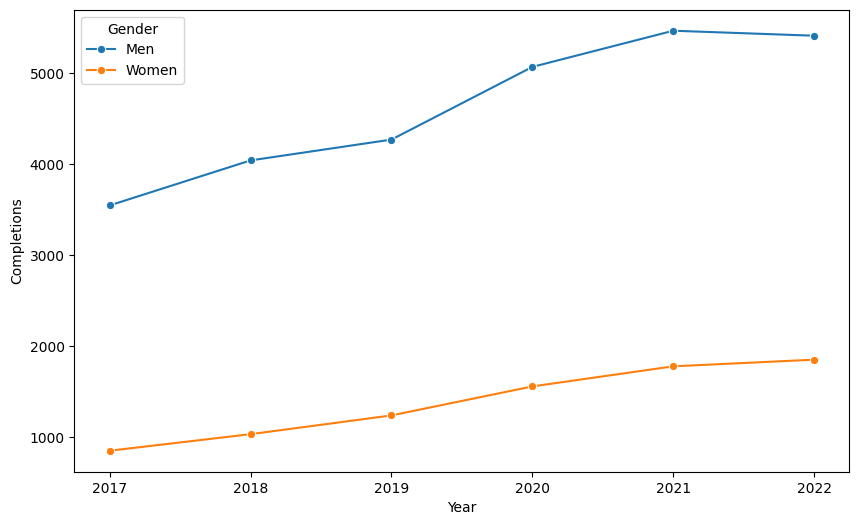

In [14]:
#general trend between genders
gender_yearly_trend = df_cs.groupby(['Year', 'Gender'])['Completions'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(data=gender_yearly_trend, x='Year', y='Completions', hue='Gender', marker='o')

In [15]:
tech_hub_universities = ["University of California-Berkeley", "University of California-San Diego (110680)",
                          "University of California-Davis", "University of California-Santa Cruz", 
                          "University of California-Los Angeles (110662)", "University of California-Irvine"]
non_tech_hub_universities = ["University of California-Santa Barbara",
                              "University of California-Merced", "University of California-Riverside"]

df_cs['Near_tech_Hub'] = df_cs['University'].apply(lambda x: "Yes" if x in tech_hub_universities else "No")
grouped_df = df_cs.groupby(['Year', 'Gender', 'Near_tech_Hub'])['Completions'].sum().reset_index()
grouped_df

C:\Users\owent\AppData\Local\Temp\ipykernel_5920\2721017212.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cs['Near_tech_Hub'] = df_cs['University'].apply(lambda x: "Yes" if x in tech_hub_universities else "No")


,Year,Gender,Near_tech_Hub,Completions
0,2017,Men,No,387
1,2017,Men,Yes,3158
2,2017,Women,No,79
3,2017,Women,Yes,769
4,2018,Men,No,498
5,2018,Men,Yes,3542
6,2018,Women,No,73
7,2018,Women,Yes,957
8,2019,Men,No,505
9,2019,Men,Yes,3764


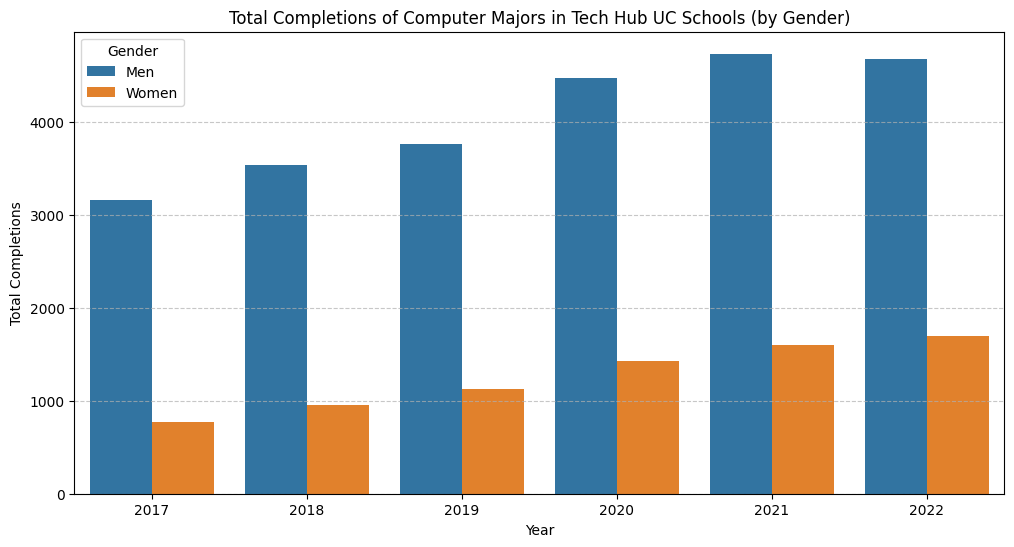

In [16]:
tech_hub_data = grouped_df[grouped_df['Near_tech_Hub'] == "Yes"]

plt.figure(figsize=(12, 6))
sns.barplot(data=tech_hub_data, x='Year', y='Completions', hue='Gender')

# Customize the plot
plt.title("Total Completions of Computer Majors in Tech Hub UC Schools (by Gender)")
plt.xlabel("Year")
plt.ylabel("Total Completions")
plt.legend(title="Gender")
plt.grid(axis='y', linestyle="--", alpha=0.7)

# Show the plot
plt.show()

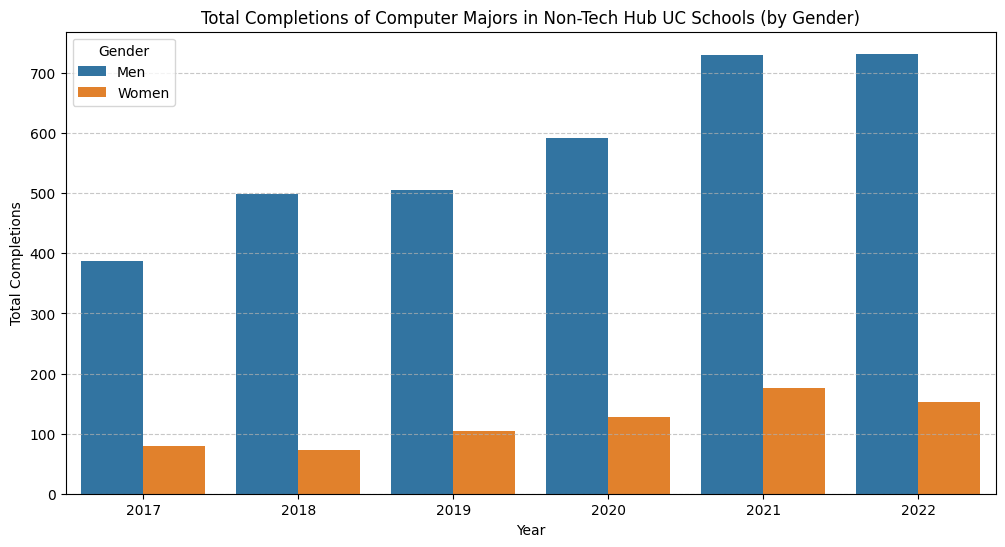

In [17]:
non_tech_hub_data = grouped_df[grouped_df['Near_tech_Hub'] == "No"]

plt.figure(figsize=(12, 6))
sns.barplot(data=non_tech_hub_data, x='Year', y='Completions', hue='Gender')

# Customize the plot
plt.title("Total Completions of Computer Majors in Non-Tech Hub UC Schools (by Gender)")
plt.xlabel("Year")
plt.ylabel("Total Completions")
plt.legend(title="Gender")
plt.grid(axis='y', linestyle="--", alpha=0.7)

# Show the plot
plt.show()

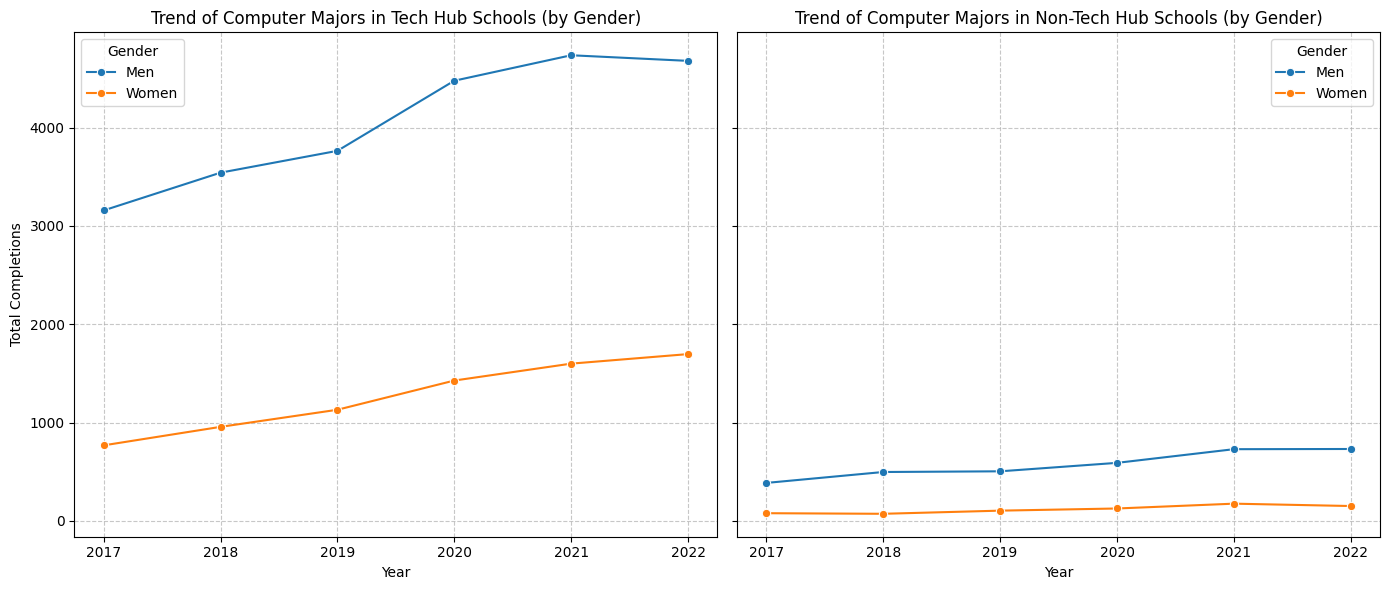

In [18]:
#line graphs comparsion for UC schools near tech hub and not near tech hub

fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Plot for Tech Hub Schools
sns.lineplot(data=tech_hub_data, x='Year', y='Completions', hue='Gender', marker='o', ax=axes[0])
axes[0].set_title("Trend of Computer Majors in Tech Hub Schools (by Gender)")
axes[0].set_xlabel("Year")
axes[0].set_ylabel("Total Completions")
axes[0].legend(title="Gender")
axes[0].grid(True, linestyle="--", alpha=0.7)

# Plot for Non-Tech Hub Schools
sns.lineplot(data=non_tech_hub_data, x='Year', y='Completions', hue='Gender', marker='o', ax=axes[1])
axes[1].set_title("Trend of Computer Majors in Non-Tech Hub Schools (by Gender)")
axes[1].set_xlabel("Year")
axes[1].set_ylabel("Total Completions")
axes[1].legend(title="Gender")
axes[1].grid(True, linestyle="--", alpha=0.7)

# Display the plots
plt.tight_layout()
plt.show()


### Interpretation

Our exploratory data analysis confirms the expected trend that universities near major tech hubs produce a higher number of computer-related degree completions compared to those located outside of these hubs.

For **male graduates**, the total number of completions at **tech hub** campuses increased from **2,525 in 2017 to 3,656 in 2022**, which significantly outpaces the numbers at **non-tech** hub campuses, which ranged from **1,020 to 1,755** over the same period. This suggests that universities located near major technology centers may attract more male students pursuing computer-related degrees, possibly due to stronger industry connections, internship opportunities, or the overall reputation of these institutions in the tech field.

A similar trend is observed for **female graduates**, where completions at **tech hub** universities grew from **638 to 1,376**, whereas **non-tech hub** universities saw lower numbers, ranging from **210 to 473**. This indicates that, for both genders, proximity to tech hubs is associated with higher degree completion rates in computer-related fields.

Overall, **these findings align with expectations**, reinforcing the idea that universities near tech hubs serve as key talent pipelines for the technology industry. The larger enrollment and completion numbers at these institutions may reflect the influence of industry demand, specialized academic programs, and stronger recruitment efforts by tech companies.

## Section 2 of EDA - Compare the number of computer completion in UC schools near Tech hub and not near Tech hub within Gender

In [19]:
df_cs

,Major,Year,University,Gender,Completions,Near_tech_Hub
24,Other Computer & Information Sciences,2022,University of California-Berkeley,Women,327,Yes
44,Other Computer & Information Sciences,2021,University of California-Berkeley,Women,279,Yes
53,Computer Science,2022,University of California-Berkeley,Women,263,Yes
63,Computer Science,2020,University of California-Berkeley,Women,239,Yes
64,Computer Science,2021,University of California-Berkeley,Women,235,Yes
...,...,...,...,...,...,...
179,General Computer Engineering,2018,University of California-Riverside,Men,53,No
180,General Computer Engineering,2020,University of California-Riverside,Men,53,No
212,General Computer Engineering,2017,University of California-Riverside,Men,46,No
213,General Computer Engineering,2022,University of California-Riverside,Men,46,No


In [20]:
uc_trend = df_cs.groupby(['Year', 'Gender', 'University', 'Near_tech_Hub'])['Completions'].sum().reset_index()
uc_trend

,Year,Gender,University,Near_tech_Hub,Completions
0,2017,Men,University of California-Berkeley,Yes,453
1,2017,Men,University of California-Davis,Yes,362
2,2017,Men,University of California-Irvine,Yes,633
3,2017,Men,University of California-Los Angeles (110662),Yes,275
4,2017,Men,University of California-Merced,No,62
...,...,...,...,...,...
103,2022,Women,University of California-Merced,No,39
104,2022,Women,University of California-Riverside,No,62
105,2022,Women,University of California-San Diego (110680),Yes,282
106,2022,Women,University of California-Santa Barbara,No,51


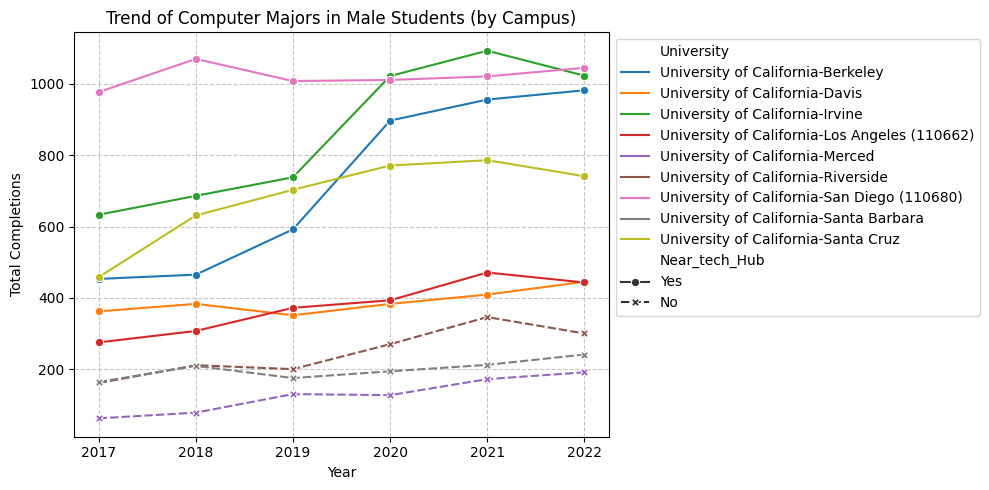

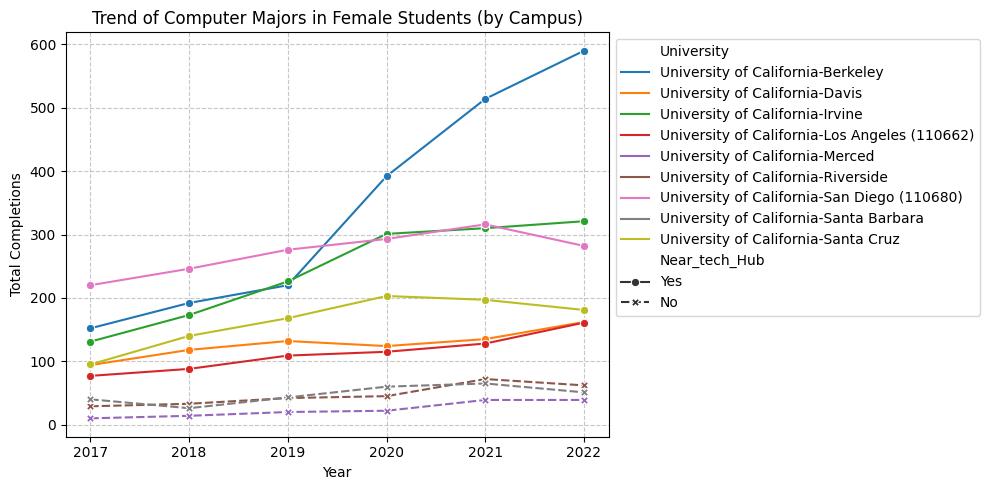

In [21]:
male_data = uc_trend[uc_trend['Gender'] == "Men"]
female_data = uc_trend[uc_trend['Gender'] == "Women"]

# Plot for Male Students
plt.figure(figsize=(10, 5))
sns.lineplot(data=male_data, x='Year', y='Completions', hue='University', style='Near_tech_Hub', markers=True)
plt.title("Trend of Computer Majors in Male Students (by Campus)")
plt.xlabel("Year")
plt.ylabel("Total Completions")
plt.grid(True, linestyle="--", alpha=0.7)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))  # Moves legend outside the plot
plt.tight_layout()
plt.show()

# Plot for Female Students
plt.figure(figsize=(10, 5))
sns.lineplot(data=female_data, x='Year', y='Completions', hue='University', style='Near_tech_Hub', markers=True)
plt.title("Trend of Computer Majors in Female Students (by Campus)")
plt.xlabel("Year")
plt.ylabel("Total Completions")
plt.grid(True, linestyle="--", alpha=0.7)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))  # Moves legend outside the plot
plt.tight_layout()
plt.show()


### Interpretation

For both male and female students, the total number of completions is **consistently higher at tech hub universities** compared to non-tech hub universities. This pattern hints that universities located near major technology centers have a stronger presence in computer-related education.

Additionally, **across all campuses, the number of male graduates surpasses that of female graduates** in computer majors. The gap between male and female completions is present at both tech hub and non-tech hub universities, acting as an evidence saying that the persistent gender disparity in these fields.

One notable exception is UC Irvine, despite being categorized as a non-tech hub university, exhibits higher completion numbers than some tech hub universities. This might be suggesting that UC Irvine may have factors contributing to its strong computer science programs, such as specialized curricula, faculty expertise, or industry partnerships.

Overall, these findings further emphasize the influence of proximity to tech hubs on computer-related degree completions, while also highlighting the gender imbalance in these fields across all institutions.

## Section 3 of EDA - Specific Major Counts between Gender

In [22]:
# Group data by Major and Gender, then sum the completions
major_gender_counts = df.groupby(['Major', 'Gender'])['Completions'].sum().reset_index()

major_gender_counts

,Major,Gender,Completions
0,Accounting,Men,237
1,Accounting,Women,459
2,Acting,Men,25
3,Acting,Women,23
4,Actuarial Science,Men,594
...,...,...,...
683,"Veterinary Preventative Medicine, Epidemiology...",Women,11
684,Vision Science & Physiological Optics,Men,15
685,Vision Science & Physiological Optics,Women,28
686,Zoology,Men,115


In [23]:
# Pivot the table
major_gender_pivot = major_gender_counts.pivot(
    index = 'Major', 
    columns = 'Gender', 
    values = 'Completions'
).fillna(0)

major_gender_pivot

Gender,Men,Women
Major,,
Accounting,237.0,459.0
Acting,25.0,23.0
Actuarial Science,594.0,367.0
"Aerospace, Aeronautical, & Astronautical Engineering",1630.0,298.0
Agricultural Engineering,39.0,34.0
...,...,...
Urban Studies,328.0,455.0
Veterinary Medicine,71.0,331.0
"Veterinary Preventative Medicine, Epidemiology, & Public Health",8.0,11.0


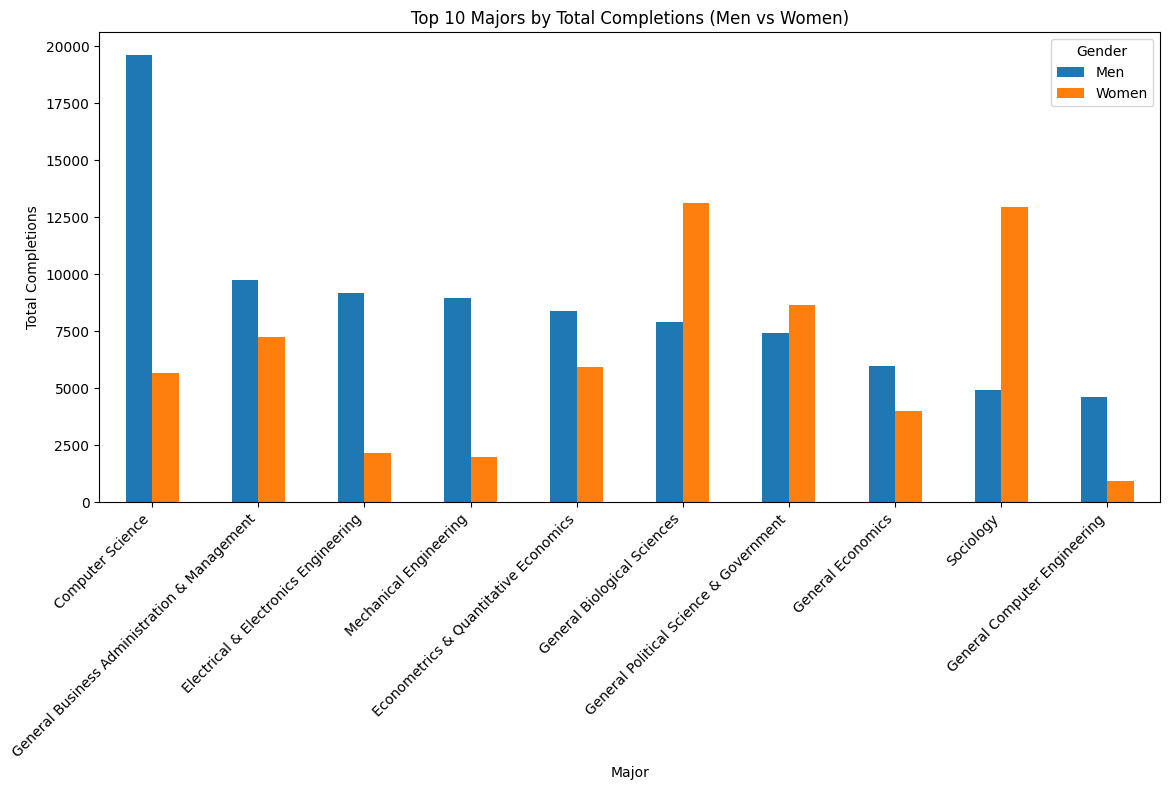

In [24]:
major_gender_pivot_sorted = major_gender_pivot.sort_values(by = 'Men', ascending = False)

# Plot a bar chart for the top 10 majors
major_gender_pivot_sorted.head(10).plot(kind = 'bar', figsize = (12,8))
plt.title('Top 10 Majors by Total Completions (Men vs Women)')
plt.xlabel('Major')
plt.ylabel('Total Completions')
plt.xticks(rotation = 45, ha = 'right')
plt.tight_layout()
plt.show()

### Interpretation

From the tables above, men are more likely to choose **STEM majors** such as Computer Science, Electrical & Electronics Engineering, Mechanical Engineering, and Quantitative Economics, with a particularly significant preference for Computer Science. Additionally, they are more inclined to select Social Science majors like Business Administration, Political Science, and General Economics.

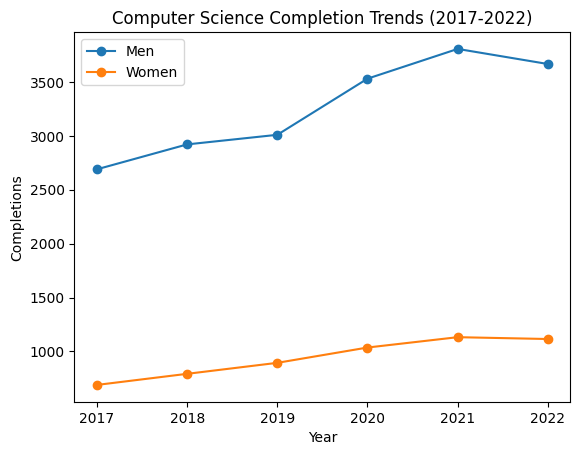

In [25]:
major_year_gender = df.groupby(['Major', 'Gender', 'Year'])['Completions'].sum().reset_index()

# For instance, filter for Computer Science to visualize its trend
cs_trend = major_year_gender[major_year_gender['Major'] == 'Computer Science']

# Plot the trend over time for Computer Science completions by gender
for gender in cs_trend['Gender'].unique():
    subset = cs_trend[cs_trend['Gender'] == gender]
    plt.plot(subset['Year'], subset['Completions'], marker = 'o', label = gender)

plt.title('Computer Science Completion Trends (2017-2022)')
plt.xlabel('Year')
plt.ylabel('Completions')
plt.legend()
plt.xticks(cs_trend['Year'].unique())
plt.show()

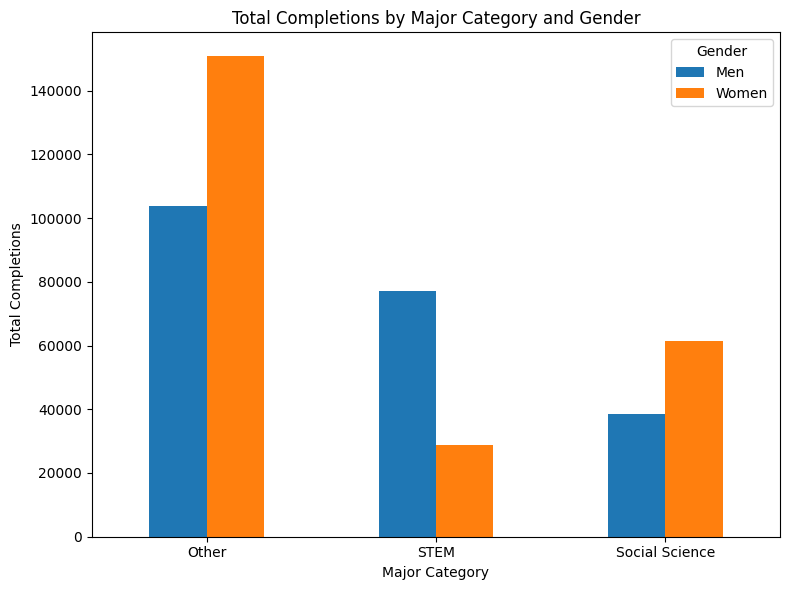

In [26]:
def classify_major(major):
    if any(keyword in major for keyword in ['Computer', 'Engineering', 'Math', 'Physics']):
        return 'STEM'
    elif any(keyword in major for keyword in ['Economics', 'History', 'Social', 'Psychology', 'Sociology']):
        return 'Social Science'
    else:
        return 'Other'

df['Major_Category'] = df['Major'].apply(classify_major)

category_counts = df.groupby(['Major_Category', 'Gender'])['Completions'].sum().reset_index()

# Pivot for visualization
category_pivot = category_counts.pivot(
    index = 'Major_Category', 
    columns = 'Gender',
    values = 'Completions'
).fillna(0)

# Plot the grouped counts for each category
category_pivot.plot(kind = 'bar', figsize = (8,6))
plt.title('Total Completions by Major Category and Gender')
plt.xlabel('Major Category')
plt.ylabel('Total Completions')
plt.xticks(rotation = 0)
plt.tight_layout()
plt.show()

### Interpretation

From the tables above, women are more likely to choose **STEM majors** like General Biological Sciences, Econometrics & Quantitative Economics, Computer Science, and Cellular & Molecular Biology. They are also more likely to choose Sociology, General Psychology, and Political Science for **Social Science**.

# Hypothesis Testing and Regression Analysis

In this part of our analysis, we are interested in understanding how various variables influence the choice of different fields of study. To do this, we will do regression analysis and hypothesis testing.

We must check our assumptions of normality, independence, homoscadasticity, and linearity are satistified in order to ensure our regression analysis is valid.

We will check every one of these assumptions for each ordinary linear regression analysis using the below functions.

In [27]:
# function to check for normality using Shapiro-Wilk test
from scipy.stats import shapiro
def normality(model, alpha = 0.05):
    sw_test = shapiro(model.resid)
    if sw_test.pvalue > alpha:
        print(f'Fail to reject H0, the data is likely normally distributed (p-value={sw_test.pvalue}, alpha = {alpha})')
    else:
        print(f'Reject H0, the data is likely not normally distributed (p-value={sw_test.pvalue}, alpha = {alpha})')

In [28]:
# function to check for hetroscedasticity and linearity by plotting residuals against fitted values

def hetro_and_linear(model):
    fitted = model.fittedvalues
    residuals = model.resid
    sns.scatterplot(x=fitted, y=residuals, alpha=0.7)
    plt.axhline(y=0, color='red', linestyle='--', linewidth=1)
    plt.xlabel("Fitted Values")
    plt.ylabel("Residual")
    plt.title("Residuals vs. Fitted Values")
    plt.show()


In [29]:
# function to check for independence by plotting the ACF fucntion against the residuals
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf
def independence(model):
    residuals = model.resid

    plot_acf(residuals, lags=20, alpha=0.05)
    plt.title("Autocorrelation of Residuals (ACF Plot)")
    plt.xlabel("Lags")
    plt.ylabel("Autocorrelation")
    plt.show()


##

## Impacts of gender, the year, and the University on Computer Science Major Completions

In [30]:
def label_cs(major):
    major_lower = major.lower()
    computer_keywords = ['computer']
    
    if any(keyword in major_lower for keyword in computer_keywords):
        return 'Computer Science'
    else:
        return 'Other'

df['Field'] = df['Major'].apply(label_cs)

df_stem = df[df['Field'] == 'Computer Science'].copy()

analysis = df_stem.groupby(
    ['University', 'Gender', 'Year'],
    as_index = False
)['Completions'].sum()

model = smf.ols(formula = 'Completions ~ C(Gender) + Year + C(University)', data = analysis).fit()

In [31]:
analysis

,University,Gender,Year,Completions
0,University of California-Berkeley,Men,2017,453
1,University of California-Berkeley,Men,2018,465
2,University of California-Berkeley,Men,2019,592
3,University of California-Berkeley,Men,2020,897
4,University of California-Berkeley,Men,2021,956
...,...,...,...,...
103,University of California-Santa Cruz,Women,2018,140
104,University of California-Santa Cruz,Women,2019,168
105,University of California-Santa Cruz,Women,2020,203
106,University of California-Santa Cruz,Women,2021,197


### Diagnostics

**Normality**

In [32]:
normality(model)

Reject H0, the data is likely not normally distributed (p-value=0.018228334961703452, alpha = 0.05)


**Heteroscedasticity and Linearity**

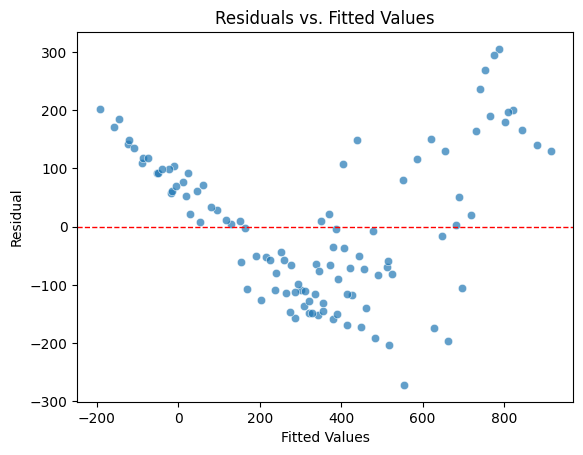

In [33]:
hetro_and_linear(model)

**Independence**

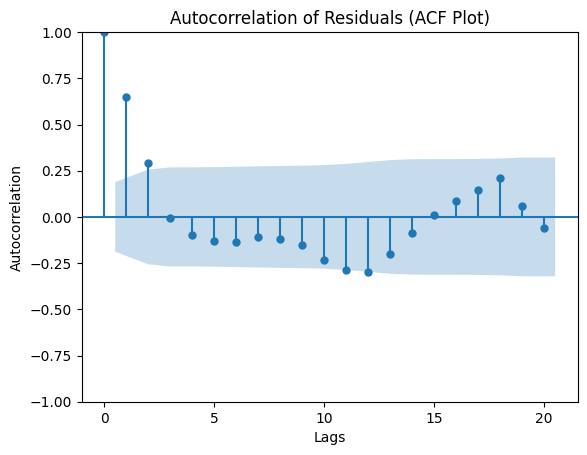

In [34]:
independence(model)

### Diagnostics Conclusion

In [35]:
print(analysis.head())

                          University Gender  Year  Completions
0  University of California-Berkeley    Men  2017          453
1  University of California-Berkeley    Men  2018          465
2  University of California-Berkeley    Men  2019          592
3  University of California-Berkeley    Men  2020          897
4  University of California-Berkeley    Men  2021          956


We can see according to the diagnostics above, our regression model fails every diagnostic. This may be because our response variable of majors that include the word "computer" in it has too much variability due to the small amount of data that have a "Computer" major as we see above. The "Computer" major may also have a non-linear relationship to a lot of the covariates. We should use a response variable that is more stable and has more data. What if we tried using every **STEM major** as our response variable?

## Impacts of gender, the year, and the University on STEM Major Completions

In [36]:
def label_field(major):
    major_lower = major.lower()
    stem_keywords = ['math', 'biology', 'physics', 'chemistry', 'computer', 'engineering']
    
    if any(keyword in major_lower for keyword in stem_keywords):
        return 'STEM Major'
    else:
        return 'Other'

df['Field'] = df['Major'].apply(label_field)

df_stem = df[df['Field'] == 'STEM Major'].copy()
analysis = df_stem.groupby(
    ['University', 'Gender', 'Year'],
    as_index = False
)['Completions'].sum()

model = smf.ols(formula='Completions ~ C(University, Treatment("University of California-San Diego (110680)")) + C(Gender) + Year', data=analysis).fit()

### Diagnostics

**Noramlity**

In [37]:
normality(model)

Fail to reject H0, the data is likely normally distributed (p-value=0.4385862202176716, alpha = 0.05)


**Heteroscedasticity and Linearity**

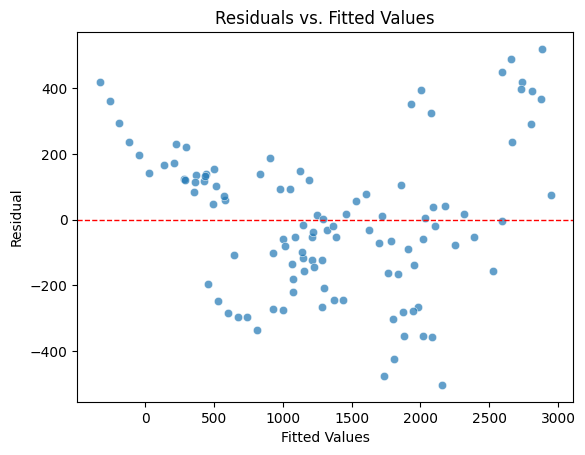

In [38]:
hetro_and_linear(model)

**Independence**

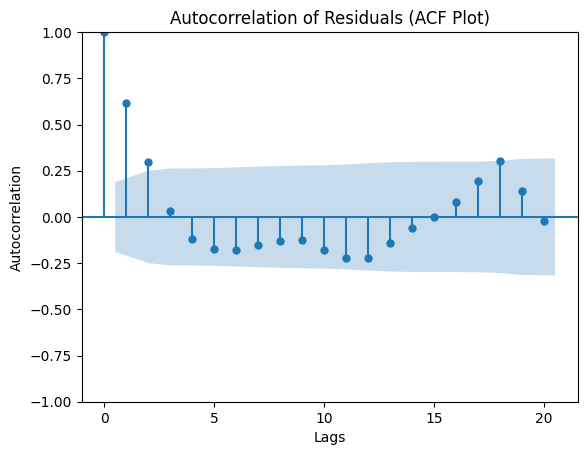

In [39]:
independence(model)

### Diagnostics Conclusion

According to our diagnostics above, our OLS model satifies every assumption except for independence. For the Shapiro-Wilk test, we obtained a p-value of around 0.43 meaning we fail to reject the null hypothesis according to our selected alpha value of 0.05. This means our residuals are most likely normally distributed. In the residuals vs. fitted values plot, we can see that there is no pattern forming and thus our errors have constant variance and our independent and dependent variables are linear.

We can see that in the ACF plot, we see at some lags, there is a positive correlation.

Further down in the analysis, we can use a different model other than OLS to better model our data. The model we will use is ARIMA since our data is time dependent to satisfy the independence diagnostic that we fail here with the OLS model.

### Regression Analysis

In [40]:
print(analysis.head())

                          University Gender  Year  Completions
0  University of California-Berkeley    Men  2017         2368
1  University of California-Berkeley    Men  2018         2592
2  University of California-Berkeley    Men  2019         2903
3  University of California-Berkeley    Men  2020         3159
4  University of California-Berkeley    Men  2021         3202


**Much more data to work with!**

In [41]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            Completions   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     127.4
Date:                Fri, 14 Mar 2025   Prob (F-statistic):           3.40e-51
Time:                        20:44:06   Log-Likelihood:                -737.61
No. Observations:                 108   AIC:                             1497.
Df Residuals:                      97   BIC:                             1527.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                                                                                                               coef    std err          t      P>|t|      [0.025      0.975]
---------------------

**Every covariate is statstically significant except for UCB** as UCB's p-value is greater than 0.05.

### Interpretation

#### Regression Analysis

The regression analysis aimed to explore the relationship between the number of STEM graduates and the predictors: university, gender, and year. The model was defined as follows:

**Dependent Variable:**

* Completions: Number of STEM degrees awarded.

**Independent Variables:**

* University: Categorical variable representing the UC campus.

* Gender: Binary variable (Men or Women).

* Year: Graduation year (2017–2022).

#### Model Diagnostics

1. **Normality:**  

    The Shapiro-Wilk test produced a p-value of **0.4386**, suggesting that the residuals most likely follow a normal distribution (fail to reject $H_0$ at $\alpha$ = 0.05). This is an essential assumption for OLS regression, and the result indicates that the model's residuals do not significantly deviate from normality, supporting the validity of the regression results.

2. **Homoscedasticity and Linearity:**  

    The residuals against fitted values plot showed no distinct pattern, indicating that the residuals' variance is consistent across the range of fitted values (homoscedasticity). Additionally, the absence of a noticeable trend in the plot suggests a linear relationship between the predictors and the response variable.

3. **Independence:**  

    The ACF plot showed some autocorrelation at specific lags, indicating a potential breach of the independence assumption. This suggests that the residuals are not entirely independent, possibly due to the time-dependent nature of the data (e.g., trends over years).

#### Regression Results

The regression model achieved an R-squared value of **0.929**, indicating that around 92.9% of the variation in STEM completions is accounted for by the predictors. This high R-squared value suggests a strong fit of the model to the data, capturing most of the underlying trends. Key insights include:

1. **University:**  

   All universities, except UC Berkeley, exhibited statistically significant differences in STEM completions compared to the reference (UC San Diego). For instance:

   - UC Davis had a coefficient of **-964.75 (p < 0.001)**, indicating significantly fewer STEM completions than UCSD.

   - UC Merced had the largest negative coefficient **(-2132.67, p < 0.001)**, showing the lowest number of STEM completions among the analyzed campuses.

   - UC Riverside and UC Santa Barbara also had significant negative coefficients, indicating fewer STEM completions compared to UCSD.

   UC Berkeley was the only university not statistically significant **(p = 0.499)**, suggesting its STEM completions are not significantly different from UCSD. This could be due to UC Berkeley's strong reputation and resources in STEM fields, which may offset any differences in proximity to tech hubs.

2. **Gender:**  

   The coefficient for `Gender[T.Women]` was **-788.31 (p < 0.001)**, which means that, on average, women graduate with fewer STEM degrees than men across UC campuses. This aligns with the broader trend of gender disparity in STEM fields. The large magnitude of the coefficient highlights the significant gap in STEM completions between men and women.

3. **Year:**  

   The coefficient for `Year` was **71.35 (p < 0.001)**, which suggests a positive trend in STEM completions over time, reflecting an overall increase in STEM graduates across UC campuses from 2017 to 2022. The positive coefficient indicates that, on average, the number of STEM completions increased by approximately **71 students per year**. This trend could be attributed to growing interest in STEM fields, increased enrollment, or institutional efforts to promote STEM education.

4. **Intercept:**

   The intercept term **(-1.413e+05)** represents the predicted number of STEM completions when all predictors are 0. While this value is not directly interpretable in this context, it serves as a baseline for the model.

5. **Multicollinearity:**  

   The condition number of **2.39e+06** is large, indicating potential multicollinearity or numerical instability in the model. This might arise from high correlations between predictors (e.g., year and university-specific trends) or the inclusion of too many categorical variables. 
   
   Multicollinearity can increase the variance of the coefficient estimates and make the model less reliable. To address this, future analyses could:

   - Reduce the number of predictors through a method of stepwise selection.

   - Use regularization methods like Ridge Regression to penalize large coefficients and stabilize the model.

## Forecasting STEM Major Completion by Gender

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

df_stem = df[df['Field'] == 'STEM Major'].copy()

analysis = df_stem.groupby(['Gender', 'Year'], as_index=False)['Completions'].sum()

pivot_data = analysis.pivot_table(index='Year', columns='Gender', values='Completions', fill_value=0)

men_series = pivot_data['Men']
women_series = pivot_data['Women']

print("Fitting ARIMA for Men...")
model_men = ARIMA(men_series, order=(1,1,1))
results_men = model_men.fit()
print(results_men.summary(), "\n")

print("Fitting ARIMA for Women...")
model_women = ARIMA(women_series, order=(1,1,1))
results_women = model_women.fit()
print(results_women.summary(), "\n")

forecast_steps = 5
    
forecast_men = results_men.forecast(steps=forecast_steps)
print("Men’s Forecast:")
print(forecast_men, "\n")

forecast_women = results_women.forecast(steps=forecast_steps)
print("Women’s Forecast:")
print(forecast_women, "\n")

Fitting ARIMA for Men...


c:\Users\owent\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\owent\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\owent\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\owent\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'

                               SARIMAX Results                                
Dep. Variable:                    Men   No. Observations:                    6
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 -58.017
Date:                Fri, 14 Mar 2025   AIC                            122.034
Time:                        20:58:24   BIC                            120.863
Sample:                    01-01-2017   HQIC                           118.890
                         - 01-01-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7836      0.025     31.294      0.000       0.735       0.833
ma.L1          0.9968      0.048     20.690      0.000       0.902       1.091
sigma2      1.674e+04   2.89e-06   5.79e+09      0.0

c:\Users\owent\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


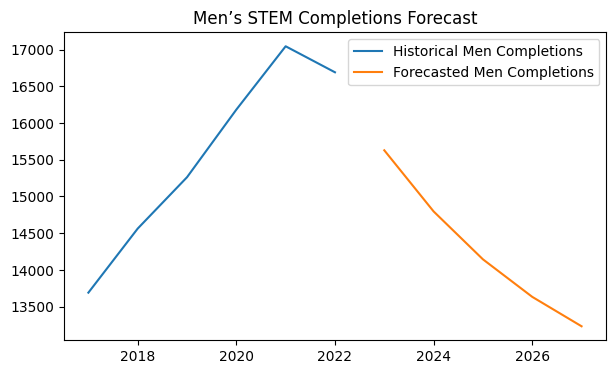

In [50]:
forecast_index_men = np.arange(men_series.index[-1] + 1,
                                   men_series.index[-1] + 1 + forecast_steps)
plt.figure(figsize=(7, 4))
plt.plot(men_series.index, men_series, label="Historical Men Completions")
plt.plot(forecast_index_men, forecast_men, label="Forecasted Men Completions")
plt.title("Men’s STEM Completions Forecast")
plt.legend()
plt.show()

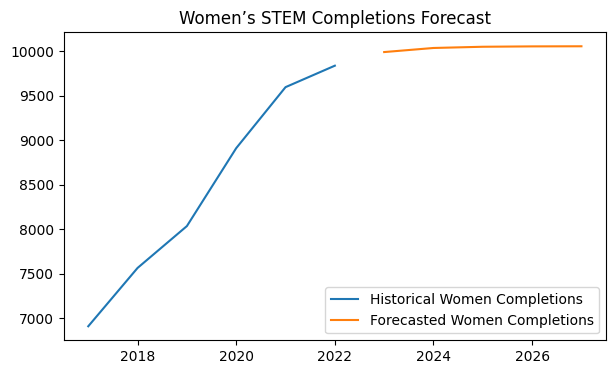

In [51]:
forecast_index_women = np.arange(women_series.index[-1] + 1,
                                     women_series.index[-1] + 1 + forecast_steps)
plt.figure(figsize=(7, 4))
plt.plot(women_series.index, women_series, label="Historical Women Completions")
plt.plot(forecast_index_women, forecast_women, label="Forecasted Women Completions")
plt.title("Women’s STEM Completions Forecast")
plt.legend()
plt.show()

### Interpretation

#### Findings for Men
- The ARIMA model shows strong autoregressive (AR) (`ar.L1 = 0.7836`) and moving average (MA) components (`ma.L1 = 0.9968`), indicating a **high dependency** on past values.
- The error variance is large (`sigma2 ≈ 16740`), which suggests substantial fluctuations.
- The forecast predicts a **gradual decline** in STEM completions for men from **15,628 in 2023 to 13,233 in 2027**.
- The plot suggests that men’s completions **peaked in recent years** and are now on a **downward trend, following a near-linear decline**.

#### Findings for Women

- The ARIMA model for women also captures a dependency on past values (`ar.L1 = 0.2998`, `ma.L1 = 0.9334`).
- However, the variance (`sigma2 ≈ 0.0002`) is unusually small, and the model suffered from convergence issues, which may indicate numerical instability.
- The forecast predicts a **stable trend** for women’s STEM completions, fluctuating slightly around **10,050 per year from 2023 to 2027**.
- Unlike men’s forecasted decline, women’s completions are **expected to remain steady with minimal changes**.

## Forecasting Computer Science Major Completion by Gender

In [56]:
df['Field'] = df['Major'].apply(label_cs)

df_computer = df[df['Field'] == 'Computer Science'].copy()

analysis = df_computer.groupby(['Gender', 'Year'], as_index=False)['Completions'].sum()

pivot_data = analysis.pivot_table(index='Year', columns='Gender', values='Completions', fill_value=0)

men_series = pivot_data['Men']
women_series = pivot_data['Women']

print("Fitting ARIMA for Men...")
model_men = ARIMA(men_series, order=(1,1,1))
results_men = model_men.fit()
print(results_men.summary(), "\n")

print("Fitting ARIMA for Women...")
model_women = ARIMA(women_series, order=(1,1,1))
results_women = model_women.fit()
print(results_women.summary(), "\n")

forecast_steps = 5
    
    # Men forecast
forecast_men = results_men.forecast(steps=forecast_steps)
print("Men’s Forecast:")
print(forecast_men, "\n")

    # Women forecast
forecast_women = results_women.forecast(steps=forecast_steps)
print("Women’s Forecast:")
print(forecast_women, "\n")


Fitting ARIMA for Men...
                               SARIMAX Results                                
Dep. Variable:                    Men   No. Observations:                    6
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 -43.136
Date:                Fri, 14 Mar 2025   AIC                             92.271
Time:                        21:04:15   BIC                             91.099
Sample:                             0   HQIC                            89.126
                                  - 6                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0968      0.164      0.592      0.554      -0.224       0.418
ma.L1          0.9993      0.118      8.487      0.000       0.768       1.230
sigma2      2.347e+04   5.0

c:\Users\owent\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\owent\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\owent\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\owent\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\owent\AppData\Local\Programs\Py

                               SARIMAX Results                                
Dep. Variable:                  Women   No. Observations:                    6
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 -30.332
Date:                Fri, 14 Mar 2025   AIC                             66.664
Time:                        21:04:16   BIC                             65.492
Sample:                             0   HQIC                            63.519
                                  - 6                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7233      0.647      1.117      0.264      -0.545       1.992
ma.L1          0.9953    211.042      0.005      0.996    -412.639     414.630
sigma2      5344.2269   1.12e+06      0.005      0.9

c:\Users\owent\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\owent\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\owent\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
c:\Users\owent\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results wi

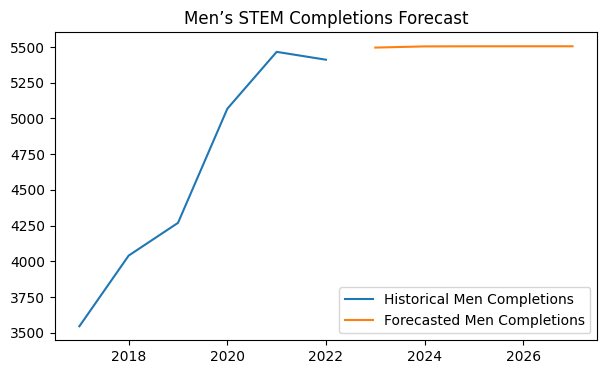

In [57]:
forecast_index_men = np.arange(men_series.index[-1] + 1,
                                   men_series.index[-1] + 1 + forecast_steps)
plt.figure(figsize=(7, 4))
plt.plot(men_series.index, men_series, label="Historical Men Completions")
plt.plot(forecast_index_men, forecast_men, label="Forecasted Men Completions")
plt.title("Men’s STEM Completions Forecast")
plt.legend()
plt.show()

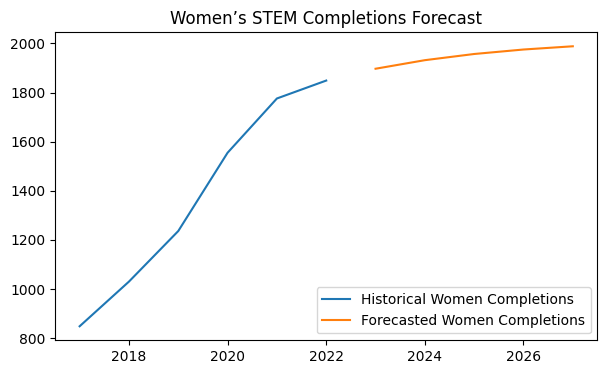

In [58]:
forecast_index_women = np.arange(women_series.index[-1] + 1,
                                     women_series.index[-1] + 1 + forecast_steps)
plt.figure(figsize=(7, 4))
plt.plot(women_series.index, women_series, label="Historical Women Completions")
plt.plot(forecast_index_women, forecast_women, label="Forecasted Women Completions")
plt.title("Women’s STEM Completions Forecast")
plt.legend()
plt.show()

### Interpretation

#### Findings for Men
- The AR coefficient (**0.0968, p = 0.554**) is small and also not significant, so we can conclude that past values have **little predictive power**.
- The MA coefficient (**0.9993, p < 0.001**) is very near to 1, indicating **strong short-term dependencies** in the data.
- The variance of residuals is very large (`sigma2 ≈ 23,470`), implying large fluctuations in data, reducing confidence in precise forecasts.
- The predictions are nearly flat, with only a slight upward trend (**5495.97 → 5504.20 → 5504.99 → 5505.08**).
- This suggests men’s CS completions might be **constant**, with no significant increase or decline projected.

#### Findings for Women

- The model seems highly unreliable due to **large standard errors**, **wide confidence intervals**, and **insignificant** AR, MA, and variance estimates, indicating possible misspecification or non-stationarity. (e.g.: The MA coefficient (`coef = 0.9953`, `std err = 211.042`) seems unstable because of the high standard error.)
- However, the variance (`sigma2 ≈ 5344.2269`) has extreme confidence intervals (`[0.025      0.975] = [-2.18e+06    2.19e+06]`), which makes interpretation unreliable.
- The forecast predicts a small upward trend (**1897.19 → 1932.05 → 1957.26 → 1975.49 → 1988.68**), suggesting a slow but steady increase in women’s CS completions.

## Hypothesis Testing

### Hypothesis Testing for STEM Majors

For this section, we will perform a two sample z test to test whether the true proportion of female STEM graduates differ significantly between tech hub and non tech hub UC campuses for every year. 

We will be testing the following hypothesis:

$$ H_0: p_{\text{Tech Hub}} = p_{\text{Non-Tech Hub}} $$
$$ H_1: p_{\text{Tech Hub}} \neq p_{\text{Non-Tech Hub}} $$

where $p_{\text{Tech Hub}}$ is the true proportion of female students completing STEM degrees at UC campuses near tech hubs and $p_{\text{Non-Tech Hub}}$ is the true proportion of female students completing STEM degrees at UC campuses farther away from tech hubs


In [ ]:
tech_hub_campuses = ["University of California-Berkeley", "University of California-San Diego (110680)",
                          "University of California-Davis", "University of California-Santa Cruz", 
                          "University of California-Los Angeles (110662)", "University of California-Irvine"]
non_tech_hub_campuses = ["University of California-Santa Barbara",
                              "University of California-Merced", "University of California-Riverside"]

yearly_results = []

for year in sorted(analysis["Year"].unique()):
    yearly_data = analysis[analysis["Year"] == year]
    
    tech_hub_female = yearly_data[(yearly_data["University"].isin(tech_hub_campuses)) & (yearly_data["Gender"] == "Women")]["Completions"].sum()
    tech_hub_total = yearly_data[yearly_data["University"].isin(tech_hub_campuses)]["Completions"].sum()
    
    non_tech_hub_female = yearly_data[(yearly_data["University"].isin(non_tech_hub_campuses)) & (yearly_data["Gender"] == "Women")]["Completions"].sum()
    non_tech_hub_total = yearly_data[yearly_data["University"].isin(non_tech_hub_campuses)]["Completions"].sum()
    
    p1 = tech_hub_female / tech_hub_total if tech_hub_total > 0 else 0
    p2 = non_tech_hub_female / non_tech_hub_total if non_tech_hub_total > 0 else 0

    p_pool = (tech_hub_female + non_tech_hub_female) / (tech_hub_total + non_tech_hub_total)
    
    se = np.sqrt(p_pool * (1 - p_pool) * (1 / tech_hub_total + 1 / non_tech_hub_total))

    if se > 0: 
        z_score = (p1 - p2) / se
        p_value = 2 * (1 - stats.norm.cdf(abs(z_score))) 
    else:
        z_score = np.nan
        p_value = np.nan
    
    yearly_results.append({"Year": year, "Tech Hub Female %": p1, "Non-Tech Hub Female %": p2, "Z-score": z_score, "p-value": p_value})

yearly_results_df = pd.DataFrame(yearly_results)

print(yearly_results_df)

   Year  Tech Hub Female %  Non-Tech Hub Female %   Z-score       p-value
0  2017           0.341905               0.295819  4.851185  1.227258e-06
1  2018           0.347764               0.308165  4.400238  1.081324e-05
2  2019           0.350492               0.311009  4.403777  1.063823e-05
3  2020           0.362446               0.312070  5.870245  4.351521e-09
4  2021           0.366187               0.326592  4.811290  1.499595e-06
5  2022           0.376153               0.340795  4.255745  2.083541e-05


### Interpretation

The proportion of female STEM graduates at tech hub campuses is consistently higher than at non-tech hub campuses across all years (2017-2022). For example, in 2017, 35.2% of STEM graduates were women at tech hub campuses, compared to 28.6% at non-tech hub campuses. By 2022, these numbers increased to 38.5% (tech hubs) and 33.4% (non-tech hubs), showing an increasing trend in female participation in both groups. Also, both tech hub and non-tech hub campuses have seen gradual increases in the proportion of female graduates from 2017 to 2022.

Since the p-value is lower across all years than alpha = 0.05, we reject the null hypothesis for every test. There is evidence that the true proportion of female STEM graduates differ significantly between tech nub and non tech hub campuses every year from 2017-2022. 



### Hypothesis Testing for CS Majors

To see whether CS trends are consistent with gender trends we found in the hypothesis test for STEM majors, we will also do a hypothesis test to compare the proportion of female CS graduates between UC schools near tech hubs and those farther from tech hubs. Since we established earlier that the CS majors data distribution does not follow a normal distribution, we will be using a Mann-Whitney U test to test our hypothesis. Our hypothesis are as follows: 

$$ H_0: F_{\text{Tech Hub}} = F_{\text{Non-Tech Hub}} $$  
$$ H_1: F_{\text{Tech Hub}} \neq F_{\text{Non-Tech Hub}} $$

 where $F$ denotes the distributions of female CS graduation proportions for tech hub and non-tech hub universities

In [ ]:
df['Field'] = df['Major'].apply(label_cs)

cs_major = df[df['Field'] == 'Computer Science'].copy()

df_cs = cs_major.groupby(
    ['University', 'Gender', 'Year'],
    as_index = False
)['Completions'].sum()

In [ ]:

from scipy.stats import mannwhitneyu

df_pivot = df_cs.pivot_table(index=["University", "Year"], columns="Gender", values="Completions", fill_value=0)

df_pivot["Female_Proportion"] = df_pivot["Women"] / (df_pivot["Women"] + df_pivot["Men"]).replace(0, float("nan"))

df_pivot.reset_index(inplace=True)

near_tech_hubs = [
    "University of California-Berkeley", "University of California-San Diego (110680)",
    "University of California-Davis", "University of California-Santa Cruz", 
    "University of California-Los Angeles (110662)", "University of California-Irvine"
]

far_from_tech_hubs = [
    "University of California-Santa Barbara",
    "University of California-Merced", "University of California-Riverside"
]

yearly_results = []

for year in sorted(df_pivot["Year"].unique()):
    yearly_data = df_pivot[df_pivot["Year"] == year]
    
    near_proportions = yearly_data[yearly_data["University"].isin(near_tech_hubs)]["Female_Proportion"].dropna().tolist()
    far_proportions = yearly_data[yearly_data["University"].isin(far_from_tech_hubs)]["Female_Proportion"].dropna().tolist()
    
    tech_hub_female_pct = (sum(near_proportions) / len(near_proportions)) * 100 if len(near_proportions) > 0 else float("nan")
    non_tech_hub_female_pct = (sum(far_proportions) / len(far_proportions)) * 100 if len(far_proportions) > 0 else float("nan")

    stat, p_value = mannwhitneyu(near_proportions, far_proportions, alternative='two-sided')

    
    yearly_results.append({
        "Year": year, 
        "Tech Hub Female %": tech_hub_female_pct, 
        "Non-Tech Hub Female %": non_tech_hub_female_pct, 
        "Mann-Whitney U": stat, 
        "p-value": p_value
    })

yearly_results_df = pd.DataFrame(yearly_results)

print(yearly_results_df)

   Year  Tech Hub Female %  Non-Tech Hub Female %  Mann-Whitney U   p-value
0  2017          20.052984              16.253297            15.0  0.166667
1  2018          22.007677              13.268604            18.0  0.023810
2  2019          23.551899              16.804492            17.0  0.047619
3  2020          23.928183              17.557621            14.0  0.261905
4  2021          24.487053              19.724666            15.0  0.166667
5  2022          25.940363              17.183116            18.0  0.023810


### Interpretation

The results indicate that from 2017 to 2022, the proportion of female CS graduates was consistently higher at UC campuses near major tech hubs compared to those farther away with the gap widening over time. In 2018, 2019, and 2022, the Mann-Whitney U test revealed a statistically significant difference (p value < alpha = 0.05). This suggests that tech hub campuses had a significantly higher proportion of female CS graduates in those years. However, in 2017, 2020, and 2021, the differences were not statistically significant, meaning the observed variations could have been due to chance for those years. The lack of consistent statistical significance across all years suggests that additional factors such as university policies or program-specific initiatives may influence female graduation rates in CS.

## Conclusion



This project looked at gender enrollment and graduation trends in STEM and computer science programs at University of California (UC) schools near major tech hubs (UCB, UCLA, UCSD, UCD, UCSC, UCI) compared to those located farther from these hubs (UCSB, UCR, UCM) from 2017 to 2022. Our findings reveal a lower STEM graduation rate for non tech hub campuses and persistent gender gap in STEM and CS graduates across all campuses, with significantly fewer women graduating in these fields compared to men every year.  

The regression analysis and hypothesis test revealed that university location, gender, and year all played significant roles in STEM graduation trends. The non-tech hub campuses (UC Merced, UC Riverside, UC Santa Barbara) had significantly lower STEM completions compared to UC San Diego (a tech hub campus) and were associated with the lowest coefficients in the model. Year was also revealed to be a significant factor in completion trends as more students graduated with a STEM degree over time. The hypothesis test revealed further findings, showing a statistically significant difference in the proportion of female STEM graduates between tech hub and non-tech hub campuses every year with tech hub campuses consistently having a higher percetage of female STEM graduates. The extremely small p-values indicated that the observed differences were unlikely due to random chance. This suggests proximity to tech hubs may provide stronger industry connections, internship opportunities, or support that contribute to higher female participation in STEM programs. 

However, while tech hub campuses showed a higher proportion of female STEM graduates, the overall gender gap remained substantial across all institutions which we saw in our regression analysis. On average, women graduated with fewer STEM degrees than men across UC campuses. This indicates that proximity to industry alone is not sufficient enough to close the gender gap in STEM and that additional support such as targeted recruitment, mentorship programs, and a stronger curriculum may be necessary to increase female representation in STEM fields.

An additional hypothesis test was conducted on CS majors to test whether they were consistent with the trends found in STEM majors. Our Mann-Whitney U test revealed that while female representation in CS was higher at tech hub campuses, statistical significance varied by year. In 2018, 2019, and 2022, tech hub campuses had a statistically significant higher proportion of female CS graduates while in 2017, 2020, and 2021, the differences were not statistically significant. This suggests that when looking at department level findings, factors other than proximity to tech hubs may also influence female participation in CS.

The findings suggest that while proximity to tech hubs may provide some advantages for STEM majors, such as stronger industry connections or internship opportunities, it is not the sole factor influencing female enrollment in CS. The variation in statistical significance by year indicates that other factors such as campus-specific policies and broader industry trends also play a role in shaping female graduation rates in CS.







## Limitations

Despite our findings, this study has several limitations. The dataset we used only includes graduation statistics and does not account for enrollment rates, retention rates, or student dropouts. This means we cannot determine whether the gender gap is driven by lower enrollment, higher dropout rates, or other underlying factors. Aother limitation is that the COVID-19 pandemic (2019–2021) likely influenced students’ major choices, yet its impact is not explicitly addressed in the analysis.  The study also does not account for other variables that may influence gender disparities in STEM, such as socioeconomic background, academic preparation, institutional policies, or campus culture. Lastly, the classification of "tech hub" versus "non-tech hub" was based on geographic proximity to major tech companies. However, this simplifies the complexity of institutional differences. Some non-tech hub schools may have strong CS programs and industry connections despite their location, making them more of a "tech hub" campus than others. 